In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Train_data = pd.read_csv('train.csv')
Train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Test_data = pd.read_csv('test.csv')
Test_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
Train_data.shape

(4209, 378)

In [5]:
Train_data.size

1591002

In [6]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
Test_data.shape

(4209, 377)

In [8]:
Test_data.size

1586793

In [9]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


# Analysis Task

### Task 1 : To find columns, the varience is equal to zero, then you need to remove those variables.

In [10]:
# First, check the original varience of all the features in the train dataset and store it to new object.
train_original_var = pd.DataFrame(Train_data.var(axis=0), columns=['Variance'])
train_original_var

C:\Users\Shriram\AppData\Local\Temp/ipykernel_4692/3104251802.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_original_var = pd.DataFrame(Train_data.var(axis=0), columns=['Variance'])


,Variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02
...,...
X380,8.014579e-03
X382,7.546747e-03
X383,1.660732e-03
X384,4.750593e-04


In [11]:
# Second, define a function to remove the features of train dataset with zero variance.
def features_zero_var(df):
    df_original_var = pd.DataFrame(Train_data.var(axis=0), columns=['Variance'])
    return((df_original_var[df_original_var.Variance==0]))

In [12]:
# Call the function to return the train dataset features having zero varience.
features_zero_var(Train_data)

C:\Users\Shriram\AppData\Local\Temp/ipykernel_4692/884013545.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_original_var = pd.DataFrame(Train_data.var(axis=0), columns=['Variance'])


,Variance
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


#### Above listed features have zero variance.

In [13]:
# Remove the features with 0 varience from train dataset and store the data in the new object.
train_original_modified = Train_data.drop(columns=train_original_var[train_original_var.Variance==0].index)
train_original_modified.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Print the original and modified shape of the train dataset
print('Shape of original train dataset is:' , Train_data.shape)
print('\nShape of modified train dataset after removing features having zero variance is:' , train_original_modified.shape)

Shape of original train dataset is: (4209, 378)

Shape of modified train dataset after removing features having zero variance is: (4209, 366)


#### The modified train dataset contains 366 features, which means the 12 features with zero variance from the original dataset is removed.

In [15]:
# Save the modified train dataset
train_original_modified.to_csv('train_original_modified.csv', index=False)

### Similarly remove the zero variance features from the test dataset 

In [16]:
# First, check the original varience of all the features in the train dataset and store it to new object.
test_original_var = pd.DataFrame(Test_data.var(axis=0), columns=['Variance'])
test_original_var

C:\Users\Shriram\AppData\Local\Temp/ipykernel_4692/365460518.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_original_var = pd.DataFrame(Test_data.var(axis=0), columns=['Variance'])


,Variance
ID,5.871311e+06
X10,1.865006e-02
X11,2.375861e-04
X12,6.885074e-02
X13,5.734498e-02
...,...
X380,8.014579e-03
X382,8.715481e-03
X383,4.750593e-04
X384,7.124196e-04


In [17]:
# Second, define a function to remove the features of train dataset with zero variance.
def features_zero_var(df):
    df_original_var = pd.DataFrame(Test_data.var(axis=0), columns=['Variance'])
    return((df_original_var[df_original_var.Variance==0]))

In [18]:
# Call the function to return the train dataset features having zero varience.
features_zero_var(Test_data)

C:\Users\Shriram\AppData\Local\Temp/ipykernel_4692/2784323263.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_original_var = pd.DataFrame(Test_data.var(axis=0), columns=['Variance'])


,Variance
X257,0.0
X258,0.0
X295,0.0
X296,0.0
X369,0.0


###### Above listed features have zero variance.

###### However, since test dataset is not considered for training and only used for testing, we can remove the same features of train dataset in the test dataset as well.
 This will ensure the same size and shape of the train ane test dataset

In [19]:
# In test dataset, remove the same features of train dataset having 0 variance
test_original_modified = Test_data.drop(columns=['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'])

In [20]:
# Display the modified test dataset after removing the features having zero variance
test_original_modified.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
# Print the original and modified shape of the train dataset
print('Shape of original test dataset is:' , Test_data.shape)
print('\nShape of modified test dataset after removing features having zero variance is:' , test_original_modified.shape)

Shape of original test dataset is: (4209, 377)

Shape of modified test dataset after removing features having zero variance is: (4209, 365)


#### The modified test dataset contains 372 features, which means the 5 features with zero variance from the original dataset is removed.

### Task 2 : To cheack for null and unique values for test and train sets.

In [22]:
# Check the null values in the train dataset 
print('The sum of null values in the train dataset is:' , train_original_modified.isnull().any().sum())

The sum of null values in the train dataset is: 0


#### There are no null values in the train dataset.

In [23]:
# Check the unique values in the train dataset
# unque() function includes the missing value
# nunique() function excludes the missing value as the default parameter is dropna=True
# Since there are no missing values in the train and test dataset, we can use nunique()

In [24]:
train_original_modified_UV = pd.DataFrame(train_original_modified.nunique(), columns=(["Unique_Values"]))
train_original_modified_UV                                                                                      

,Unique_Values
ID,4209
y,2545
X0,47
X1,27
X2,44
...,...
X380,2
X382,2
X383,2
X384,2


In [25]:
# Print the train dataset features unique values where the values = 2 and values>2.
print('Train Features with unique values greater than 2 are as follows:\n' , train_original_modified_UV[train_original_modified_UV.Unique_Values>2].unstack())
print('Train Features with unique values equl to 2 are as follows:\n' , train_original_modified_UV[train_original_modified_UV.Unique_Values==2].unstack())


Train Features with unique values greater than 2 are as follows:
 Unique_Values  ID    4209
               y     2545
               X0      47
               X1      27
               X2      44
               X3       7
               X4       4
               X5      29
               X6      12
               X8      25
dtype: int64
Train Features with unique values equl to 2 are as follows:
 Unique_Values  X10     2
               X12     2
               X13     2
               X14     2
               X15     2
                      ..
               X380    2
               X382    2
               X383    2
               X384    2
               X385    2
Length: 356, dtype: int64


#### Out of 366 train dataset features, 10 features are having greater than 2 unique values and remaining features are having only 2 unique values (0 and 1).

### Similarly check the null and unique values in the test dataset.

In [26]:
# Check the null values in the test dataset 
print('The sum of null values in the test dataset is:' , test_original_modified.isnull().any().sum())

The sum of null values in the test dataset is: 0


#### There are no null values in the test dataset.

In [27]:
# Check the unique values in the train dataset
test_original_modified_UV = pd.DataFrame(test_original_modified.nunique(), columns=(["Unique_Values"]))
test_original_modified_UV                                                                                      

,Unique_Values
ID,4209
X0,49
X1,27
X2,45
X3,7
...,...
X380,2
X382,2
X383,2
X384,2


##### Comment:
    1. It is observed that all the values in ID's are unique. In the provided dataaset, the ID represents the unique car configuration. So, this feature must be ignored for testing as it will not make any sense to the prediction.
    2. 'y' feature is the target feature.
    3. Features X0,X1,X2,X3,X4,X5,X6,X7,X8 are the categorical features which must be converted to numerical values/ordinal encoded values.
    4. All the features after X8 are having binary values.

In [28]:
# Print the test dataset features unique values where the values = 2 and values>2.
print('Test Features with unique values greater than 2 are as follows:\n' , test_original_modified_UV[test_original_modified_UV.Unique_Values>2].unstack())
print('Test Features with unique values equl to 2 are as follows:\n' , test_original_modified_UV[test_original_modified_UV.Unique_Values==2].unstack())


Test Features with unique values greater than 2 are as follows:
 Unique_Values  ID    4209
               X0      49
               X1      27
               X2      45
               X3       7
               X4       4
               X5      32
               X6      12
               X8      25
dtype: int64
Test Features with unique values equl to 2 are as follows:
 Unique_Values  X10     2
               X12     2
               X13     2
               X14     2
               X15     2
                      ..
               X380    2
               X382    2
               X383    2
               X384    2
               X385    2
Length: 351, dtype: int64


##### Out of 372 test dataset features, 9 features are having greater than 2 unique values and remaining features are having only 2 unique values (0 and 1).

### Task 3 : To apply Label Encoder on Train and Test data set.

#####  Perform label encoder/Ordinal Encoder for categories features of trian dataset

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
le_profession = OrdinalEncoder()
le_profession.fit(train_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']])

OrdinalEncoder()

In [31]:
le_profession.categories_

[array(['a', 'aa', 'ab', 'ac', 'ad', 'af', 'ai', 'aj', 'ak', 'al', 'am',
        'ao', 'ap', 'aq', 'as', 'at', 'au', 'aw', 'ax', 'ay', 'az', 'b',
        'ba', 'bc', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
       dtype=object),
 array(['a', 'aa', 'ab', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
        'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y',
        'z'], dtype=object),
 array(['a', 'aa', 'ac', 'ae', 'af', 'ag', 'ah', 'ai', 'ak', 'al', 'am',
        'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ay',
        'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
        'o', 'p', 'q', 'r', 's', 't', 'x', 'y', 'z'], dtype=object),
 array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object),
 array(['a', 'b', 'c', 'd'], dtype=object),
 array(['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'c', 'd', 'f', 'g',
        'h', 'i', 'j', 'k', 'l', 'm', 'n', 

#### fit method learns the transformer's attributes. It does not change the column. To change the column we will now use the learnt attribute to do the transformation by using transform function

In [32]:
train_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']] = le_profession.transform(train_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']])
train_original_modified

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32.0,23.0,17.0,0.0,3.0,24.0,9.0,14.0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32.0,21.0,19.0,4.0,3.0,28.0,11.0,14.0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8.0,20.0,16.0,2.0,3.0,0.0,3.0,16.0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31.0,16.0,40.0,3.0,3.0,0.0,7.0,7.0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8.0,23.0,38.0,0.0,3.0,0.0,6.0,4.0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9.0,19.0,25.0,5.0,3.0,0.0,11.0,20.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
le_profession.inverse_transform(train_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']])

array([['k', 'v', 'at', ..., 'u', 'j', 'o'],
       ['k', 't', 'av', ..., 'y', 'l', 'o'],
       ['az', 'w', 'n', ..., 'x', 'j', 'x'],
       ...,
       ['ak', 'v', 'r', ..., 'aa', 'g', 'e'],
       ['al', 'r', 'e', ..., 'aa', 'l', 'u'],
       ['z', 'r', 'ae', ..., 'aa', 'g', 'w']], dtype=object)

##### Similarly perform label encoder/Ordinal Encoder for categories features of trian dataset

In [34]:
le_profession = OrdinalEncoder()
le_profession.fit(test_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']])

OrdinalEncoder()

In [35]:
le_profession.categories_

[array(['a', 'ad', 'ae', 'af', 'ag', 'ai', 'aj', 'ak', 'al', 'am', 'an',
        'ao', 'ap', 'aq', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az',
        'b', 'ba', 'bb', 'bc', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
        'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
        'z'], dtype=object),
 array(['a', 'aa', 'ab', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
        'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y',
        'z'], dtype=object),
 array(['a', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak',
        'al', 'am', 'an', 'ao', 'ap', 'aq', 'as', 'at', 'au', 'av', 'aw',
        'ax', 'ay', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'm', 'n',
        'p', 'q', 'r', 's', 't', 'u', 'w', 'x', 'y', 'z'], dtype=object),
 array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object),
 array(['a', 'b', 'c', 'd'], dtype=object),
 array(['a', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'b', 'c', 'd',
        'f', 'g', 'h', 

##### fit method learns the transformer's attributes. It does not change the column. To change the column we will now use the learnt attribute to do the transformation by using transform function

In [36]:
test_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']] = le_profession.transform(test_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']])
test_original_modified

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21.0,23.0,34.0,5.0,3.0,26.0,0.0,22.0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42.0,3.0,8.0,0.0,3.0,9.0,6.0,24.0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21.0,23.0,17.0,5.0,3.0,0.0,9.0,9.0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21.0,13.0,34.0,5.0,3.0,31.0,11.0,13.0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45.0,20.0,17.0,2.0,3.0,30.0,8.0,12.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6.0,9.0,17.0,5.0,3.0,1.0,9.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42.0,1.0,8.0,3.0,3.0,1.0,9.0,24.0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47.0,23.0,17.0,5.0,3.0,1.0,3.0,22.0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7.0,23.0,17.0,0.0,3.0,1.0,2.0,16.0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
le_profession.inverse_transform(test_original_modified[['X0','X1','X2','X3','X4','X5','X6','X8']])

array([['az', 'v', 'n', ..., 't', 'a', 'w'],
       ['t', 'b', 'ai', ..., 'b', 'g', 'y'],
       ['az', 'v', 'as', ..., 'a', 'j', 'j'],
       ...,
       ['y', 'v', 'as', ..., 'aa', 'd', 'w'],
       ['ak', 'v', 'as', ..., 'aa', 'c', 'q'],
       ['t', 'aa', 'ai', ..., 'aa', 'g', 'r']], dtype=object)

### Task 4 : To perform dimensionality reduction.

In [72]:
# Before performing dimensionality reduction principal component analysis (PCA), separate the following:
# features 'ID' and 'y' from train_original_modified dataset and store in the new object
# features 'ID' from  test_original_modified.shape and store it in the new object

In [73]:
# Store 'ID' values into the new object train_ID and test_ID and verify the shape

In [122]:
# Train dataset 
train_ID =  train_original_modified.ID
print('The shape of the ID feature in train dataset is:' ,train_ID.shape)

# Test dataset 
test_ID =  test_original_modified.ID
print('The shape of the ID feature in test dataset is:' ,test_ID.shape)


The shape of the ID feature in train dataset is: (4209,)
The shape of the ID feature in test dataset is: (4209,)


In [123]:
# Store the remaining values into the new object train_X and test_X and verify the shape

# Train dataset
train_X = train_original_modified.drop(columns = ['ID', 'y'])
print('The shape of the final train dataset is:' ,train_X.shape)

# Test dataset
test_X = test_original_modified.drop(columns = ['ID'])
print('\nThe shape of the final test dataset is:' ,test_X.shape)


The shape of the final train dataset is: (4209, 364)

The shape of the final test dataset is: (4209, 364)


In [124]:
# Store the 'y' values intonthe new object train_y and verify the shape
train_y = train_original_modified.y
print('The shape of the target feature of train dataswt is:' ,train_y.shape)

The shape of the target feature of train dataswt is: (4209,)


In [125]:
# Import the required pca liberary
from sklearn.decomposition import PCA

In [126]:
# Before performing pca, the data needs to centered and scaled
# After centering, the average value for each train and train features will be 0
# After scaling, the standard deviation for each feature will be 1

##### Since all the features are having 0 and 1, there is no need to standardize

In [127]:
# Create a PCA object (instantiate) 
pca = PCA()

In [128]:
# fit and transform the train dataset
# transform the test dataset


In [129]:
pca = PCA(n_components=30)

In [130]:
# fit the train dataset
pca_fit_train_X = pca.fit(train_X)

In [131]:
pca.explained_variance_ratio_

array([3.83347821e-01, 2.13880326e-01, 1.32618659e-01, 1.18266425e-01,
       9.20600842e-02, 1.59060433e-02, 7.44539716e-03, 4.33701278e-03,
       2.94020637e-03, 2.41796178e-03, 2.36488035e-03, 2.03228597e-03,
       1.67203776e-03, 1.48111202e-03, 1.28702378e-03, 1.03575260e-03,
       9.57334243e-04, 8.96963711e-04, 7.85687496e-04, 7.09719878e-04,
       6.44381968e-04, 6.23812972e-04, 5.84619659e-04, 5.12442833e-04,
       4.84777573e-04, 4.33103598e-04, 4.13934544e-04, 3.77636066e-04,
       3.68605495e-04, 3.56041808e-04])

In [132]:
pca.explained_variance_ratio_.shape

(30,)

In [133]:
np.sum(pca.explained_variance_ratio_)

0.9912420905191127

In [134]:
# transform the train dataset
train_X_fit_tranformed = pca_fit_train_X.transform(train_X)

In [135]:
# transform the train dataset
test_X_transformed = pca.transform(test_X)

In [136]:
train_X_fit_tranformed.shape, test_X_transformed.shape

((4209, 30), (4209, 30))

In [137]:
pca.inverse_transform(train_X_fit_tranformed).shape

(4209, 364)

In [138]:
# Check the variation for the first 30 principal components
pca_train_X_variation = np.round(pca_fit_train_X.explained_variance_ratio_.cumsum()*100, decimals=1)
pca_train_X_variation

array([38.3, 59.7, 73. , 84.8, 94. , 95.6, 96.4, 96.8, 97.1, 97.3, 97.6,
       97.8, 97.9, 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8,
       98.8, 98.9, 98.9, 99. , 99. , 99.1, 99.1, 99.1])

In [139]:
# Assign labels for each PC's as PC1 and PC2, ...etc for visulization in scree plot
labels = ['PC' + str(x) for x in range(1,len(pca_train_X_variation) + 1)]

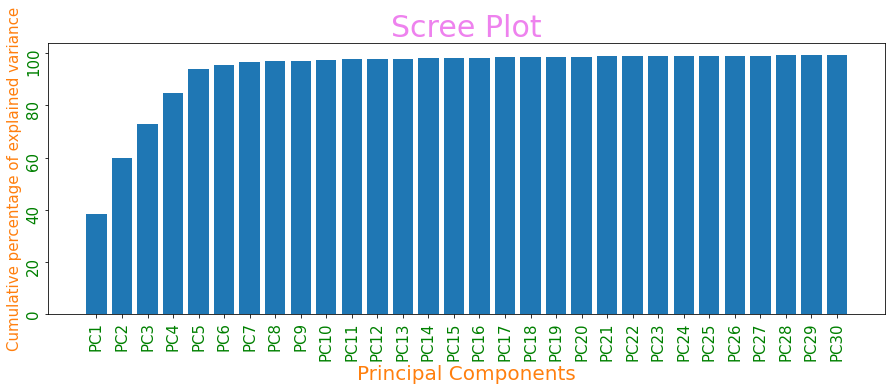

In [140]:
# Generate the scree plot
plt.figure(figsize=(15,5))
plt.bar(x=range(1,len(pca_train_X_variation) + 1), height=pca_train_X_variation, tick_label=labels)
plt.xticks(rotation=90, color='green', size=15)
plt.yticks(rotation=90, color='green', size=15)
plt.title("Scree Plot", color='violet', fontsize= 30)
plt.xlabel('Principal Components', {'color' : 'tab:orange', 'fontsize':20})
plt.ylabel('Cumulative percentage of explained variance', {'color' : 'tab:orange', 'fontsize':15})
plt.show()


##### Above scree plot shows that considering first 30 principal components should be sufficient to represent the train_X dataset

In [141]:
# Draw the 2D pca plot by considering only PC1 and PC2
# pca plot visulize how the data is spread across the origin with new coordinates, based on the loading scores and scaling.
# Put the new coordinates created by pca_fit_transform_train_X into matrix
# Rows are the observations (X) and columns are the Principal Components (Y)

In [142]:
pca_fit_transform_train_X_df = pd.DataFrame( train_X_fit_tranformed, columns=labels)
pca_fit_transform_train_X_df.head()    

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.614765,-0.133009,15.624460,3.687564,1.359574,-2.691417,3.816741,1.537687,-0.647686,1.737523,...,-0.098501,-0.176134,-0.080923,-1.312045,0.164187,-0.079288,1.352753,1.323549,-0.651868,-0.037748
1,0.565407,1.560333,17.909581,-0.092902,1.536648,-4.442877,-0.796540,0.812571,-0.789268,-0.136565,...,-0.137238,-1.023778,-0.541239,0.490844,-0.259998,-0.587628,1.435220,0.444628,-0.757190,-0.178159
2,16.201713,12.292846,17.633540,0.186308,11.850820,-2.155389,0.828190,1.580676,-0.608199,-0.485257,...,0.592064,0.632807,-0.229850,0.255179,1.373396,0.370936,0.100369,-0.204697,-0.246243,0.046652
3,16.149998,13.535419,14.898695,-3.140917,-6.832193,-4.290014,-2.225924,2.099091,0.040956,-0.979216,...,-0.367805,0.307542,-0.029970,-0.090880,1.496205,-0.775480,-0.205411,0.438090,0.025565,0.023161
4,16.459103,13.175004,4.403096,7.671151,2.139916,3.763860,-1.954082,2.103654,1.178386,-1.021905,...,0.090166,-0.050347,-0.046020,-0.033261,0.555719,-0.072315,0.440109,-0.171539,0.120990,-0.132408


In [143]:
# Draw 2D plot PCA plot for PC1 and PC2
# Removing the cumsum() from the earlier expalained ratio calculation
pca_train_X_variation_Nocumsum = np.round(pca_fit_train_X.explained_variance_ratio_*100, decimals=1)

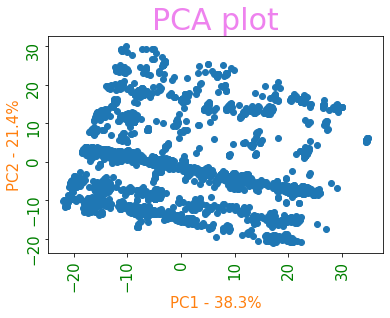

In [144]:
plt.scatter(pca_fit_transform_train_X_df.PC1, pca_fit_transform_train_X_df.PC2)
plt.xticks(rotation=90, color='green', size=15)
plt.yticks(rotation=90, color='green', size=15)
plt.title("PCA plot", color='violet', fontsize= 30)
plt.xlabel('PC1 - {0}%'.format(pca_train_X_variation_Nocumsum[0]), {'color' : 'tab:orange', 'fontsize':15})
plt.ylabel('PC2 - {0}%'.format(pca_train_X_variation_Nocumsum[1]), {'color' : 'tab:orange', 'fontsize':15})
plt.show()

# The Principal components are zero-indexed, So, PC1=[0], PC2=[1]

##### Comment:
    
    1.Above PCA plot shows that how the dara is spread along X-axis(PC1) and Y-axis(PC2).
    2.38.3% variance of the data is explained by PC1 and 21.4% of the data is explained by PC2.
    3.Similarly we visilize how the data is spread among other pricipal component as well

In [145]:
# Print the loading scores 
# Loading scores explains the proportion of each observation with respect to each principal components
# Lets check only for the PC1
loading_scores = pd.Series(pca.components_[0])

# Sort the loading svores based on absolute value
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# Display only the top 10 loading scores
sorted_loading_scores[0:10]

0      0.931138
2      0.257714
1      0.245494
7      0.036938
119    0.017235
177    0.017027
183    0.017027
341    0.017001
80     0.015471
294    0.014104
dtype: float64

In [146]:
# Print the minimum and maxmum loading scores of PC1
print(sorted_loading_scores.min())
print(sorted_loading_scores.max())

7.160618563899331e-07
0.9311384705341247


##### Comment:
    
    1. It can be concluded from the above loading scores that, almost all the observations of the train datasets play a role in separating the Principal components PC1
    2. Example: The 175th observation has a 1 unit long vector consisting of the following:
            * 0.931138 PC1 +......+XnPCn
            * 0.931138 is properation of 175th observation for PC1
            * This unit vector is called singular vector or eigen vector for PC1
    3.similarly the loading scores will be calculated for PC2 as pca.components[1], etc.        

In [147]:
# Fron PCA, the final train and test datasets are as follows
# train data
train_X_fit_tranformed.shape

(4209, 30)

In [148]:
#test data
test_X_transformed.shape

(4209, 30)

In [149]:
# train label
train_y.shape

(4209,)

In [150]:
# train ID
train_ID.shape

(4209,)

In [151]:
# test ID
test_ID.shape

(4209,)

### Task 4 : To predict test_df values using XGBoost

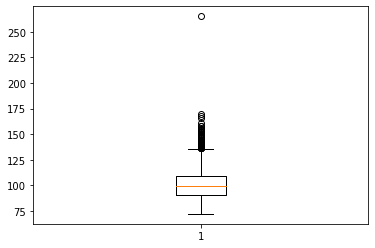

In [152]:
# Before predicting the test values, lets check the target variable train_y for any outliers
# If present, the value will be replaced with median values
# Using boxplot to identify the outliers
plt.boxplot(train_y)
plt.show()

##### Outliers are observed in the target variable train_y

In [153]:
# Print the 50th percentile value which is the median
print(train_y.quantile(0.50))

99.15


In [154]:
# Print the 95th percentile value 
print(train_y.quantile(0.95)) 

120.806


In [155]:
# Replace the outlier with median values
train_y = np.where(train_y > 120.806, 99.15, train_y)


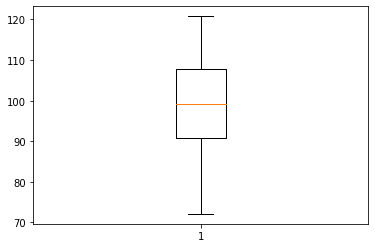

In [156]:
# Verify again with box_plot after replacing the outliers with median values
plt.boxplot(train_y)
plt.show()


In [157]:
# Check the shape again   
train_y.shape

(4209,)

##### Comments:

    1.It is evident from the box plot that outliers are replaced with median values in the target variable train_y
    2.Also, there is no change in the shape of the target variable. Hence its good to go with further steps


In [182]:
# install xgboost
! pip install xgboost

In [197]:
# import the required libraries
import time
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
# Since objective is to predict continuous variable we use XGBregressor
from xgboost import XGBRegressor

In [198]:
# Evaluation metrics for regression
### Mean Absolute Error, Mean Squared Error and R2
# We will use R2 in this case
# R2 is also known as Coefficient of Determination
# It gives the percentage variation in 'y' (test time) explained by 'X'variables
# or,it gives the percentage of data points that fall within the regression line
# R2= (1-SSR/SST) 
# SSR- Sum of square residual; SST- Sum of squares total
# R2 value should be between 0 to 1
# -R2 valve indicates the worst model

In [199]:
# print the XGBoost parameters
print(XGBRegressor())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [200]:
# Instantiate the Regressor
# specifying random_state ensures same result if we run the model multiple times
# Objective will be automatically set to ''reg:squarederror'
xgb_reg = xgb.XGBRegressor() 

In [201]:
#To find best XGBoost Parameters
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }
## Explainations of the parameters
# 'max_depth' - Maximum depth of trees (default = 6, range: [0,∞])
# 'Learning rate'(eta) - scaling the tree by learning rate predicts the output in smaller steps closer to the actual value.
# 'reg_lambda' - L1 regularization parameter on weights to avoid overfit
#  'reg_alpha' - L1 regularization parameter on weights to avoid overfit
# 'gamma' - Minimum loss reduction required to make a further partition on a leaf node of the tree (pruning)
# 'min_child_weight' - default =1. If the weights of each leaf is less than the min_child weight, then ramove the leaf
# So weights of the each leaf is > min_child_weight
# 'colsample_bytree': It is the subsample ratio of columns when constructing each tree.
# 'Subsample' is the  ratio of the training instances.Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. This will prevent overfitting. 
# Subsampling will occur once in every boosting iteration.
# 'n_estimators' is the number of trees

In [202]:
# Optimize the Hyperparameter using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [203]:
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
Random_Search=RandomizedSearchCV (xgb_reg,params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 
# cv=10 - Number of folds in a `(Stratified)KFold

In [204]:
# Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(train_X_fit_tranformed, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                       

In [205]:
# Print the best estimator
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.001, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=0,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.001, reg_lambda=10, ...)

In [206]:
#Print the best parameters
Random_Search.best_params_

{'subsample': 1,
 'reg_lambda': 10,
 'reg_alpha': 0.001,
 'n_estimators': 500,
 'min_child_weight': 0,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.001,
 'colsample_bytree': 0.7}

In [210]:
# Instantiate the XGBoost classifier with the best estimators and parameters
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
# Check the r2 score of the model using Number of folds in a `(Stratified)KFold` cv=10
r2_Score = cross_val_score(xgb_reg, train_X_fit_tranformed, train_y, scoring='r2',cv=10)
r2_Score

array([0.65436546, 0.63109827, 0.52570446, 0.65355931, 0.64484258,
       0.5947896 , 0.51915124, 0.65021914, 0.64435957, 0.66105765])

In [212]:
# Print the mean r2_score
print('r2_score of the model with cross validation is:',round(r2_Score.mean(),2))

r2_score of the model with cross validation is: 0.62


##### Comments

    1.Since r2_score with cross validation is: 0.62 or 62 % which is between 50 to 100%. Hence, its good to proceed with the prediction of time the car takes to pass testing using test data.
    2.This means the model explains 62% variability of the target variable (y) around its mean.

In [213]:
# Fit the training data
xgb_reg.fit(train_X_fit_tranformed,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=10, ...)

In [214]:
# predict the time taken by car to pass testing using test dataset
X_test_pred = xgb_reg.predict(test_X_transformed)
X_test_pred 

array([ 79.128876,  92.983475,  77.78317 , ...,  92.299034, 108.69983 ,
        93.64422 ], dtype=float32)

In [215]:
# print the predicted value (time) in the form of table
df_test_pred = pd.DataFrame({'ID': test_ID, 'y': X_test_pred})
# Print the first 10 predicted values
df_test_pred.head(10)

,ID,y
0,1,79.128876
1,2,92.983475
2,3,77.783173
3,4,77.197304
4,5,107.544250
5,8,88.816566
6,10,107.806061
7,11,97.575119
8,12,111.287308
9,14,93.116371


In [216]:
# save the predicted time values 
df_test_pred.to_csv('submission.csv', index=False)

##### Conclusion:
    
    For a given dataset, XGBoost Regressor algorithm with cross validation results in R2 score of 0.62.

##### Scope of Future Work:
    
    1.I have conisdered 30 principal components for the study using principal component analysis(PCA). Features can be further reduced by using different dimensionality reduction techniques.
    2.I have used only XGBoost Regressor algorithm for predicting the time, a Mercedes-Benz spends on the test bench. R2 score can be further improved by using other regressor algorithms with hyperparameter tuning and cross validation.
    3.As the number of features are more, Deep learning techniques can also be used for the study.

##                                      ***      Project Completed     ***